<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/504308/932986/ef38c9d738d2e0dbeec85212f90c608e/dataset-cover.png?t=2020-02-09-00-36-15" style="display:block; margin:auto; border:1px solid LightGrey;" width=65% height='250'/>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>US Army Anthropometric Working Databases (ANSUR II)</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Multi-Class Classification problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

**WELCOME!**

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

**Determines**

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

<a id="0">**TASKS**</a>

01. Exploratory Data Analysis (EDA)
    - Import Libraries, Load Dataset, Exploring Data
      1. *i. Import Libraries*
      2. *ii. Ingest Data*
      3. *iii. Explore Data*
      4. *iv. Outlier Detection*
      5. *v.  Drop unnecessary features*
02. Data Preprocessing
    + Scale (if needed)
    + Separete the data frame for evaluation purposes
03. Multi-class Classification
    * Import libraries
    * Implement SVM Classifer
    * Implement Decision Tree Classifier
    * Implement Random Forest Classifer
    * Implement XGBoost Classifer
    * Compare The Models

<a id="1"></a>

# EDA

<!-- <a href="#0" class="btn btn-primary btn-sm" role="button" aria-pressed="true" data-toggle="popover" style="background-color:DarkOrange; color:White;">**Tasks**</a> -->

- Drop unnecessary colums
- Drop **DODRace** class if **`value count below 500`** (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# !pip install skimpy
from skimpy import clean_columns

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [98]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [99]:
df_female_origin = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
df_female = df_female_origin.copy()
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [100]:
df_male_origin = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='unicode_escape')
df_male = df_male_origin.copy()
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [101]:
df_female.shape, df_male.shape

((1986, 108), (4082, 108))

In [102]:
df_female.info(), df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None)

In [103]:
df_male.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [104]:
# with iloc column over 100
# df_female.iloc[:, :100].info(), df_female.iloc[:, 100:].info()

In [105]:
# df_female.info(verbose=True)

## Explore Data

### If needed, rename the columns' names for easy use. 

In [106]:
(df_female.columns!=df_male.columns).sum()

1

In [107]:
# df_female.columns==df_male.columns
df_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [108]:
df = pd.concat([df_female,df_male], ignore_index=True)

In [109]:
df.shape

(6068, 108)

In [110]:
# clean_columns(df)

### Check if there are some dublicate rows or not. If there are, then drop them.

In [111]:
df.duplicated().sum()

0

### Basically check the missing values. (NaN, None)-(isna(), mean())

In [112]:
(df.isna().mean()*100).tail(10)

Branch                   0.0000
PrimaryMOS               0.0000
SubjectsBirthLocation    0.0000
SubjectNumericRace       0.0000
Ethnicity               76.5821
DODRace                  0.0000
Age                      0.0000
Heightin                 0.0000
Weightlbs                0.0000
WritingPreference        0.0000
dtype: float64

### Check the statistical values of features.

In [113]:
df.describe(include='number')

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000,6068.0000
mean,20757.1984,246.4687,1406.1613,327.3744,224.8914,1299.6088,244.1926,194.7546,399.2042,340.9342,274.7350,490.7544,72.2526,324.8965,306.6361,139.7235,1020.0847,241.6200,870.1523,608.9992,497.0976,386.0412,1477.4904,282.8591,1022.0989,251.7385,1252.0132,825.1101,621.8517,351.3159,35.1322,62.6259,22.2633,240.9113,785.9145,98.8654,263.0336,338.7666,295.0107,552.0760,467.0071,1102.0493,84.9534,203.8614,189.2866,152.1828,570.0353,196.3349,332.6229,70.7569,348.3855,385.7334,1040.0595,632.6020,412.0377,432.3408,475.5129,540.1249,483.2396,69.5804,406.4799,119.5188,375.4412,413.8347,1388.4044,113.9166,416.1870,259.1923,1129.3622,354.0836,145.0727,898.1078,866.6653,576.9000,1763.7948,1714.4061,1402.9491,1099.5872,622.1987,176.3364,789.6956,458.2446,129.6180,882.7399,1630.3095,460.5247,317.7500,914.5015,229.6740,377.0038,1031.5012,797.0939,169.0030,830.0600,17.5153,1.6150,29.7612,68.2573,174.7497
std,13159.3909,37.4001,79.0910,20.7200,16.0518,72.0223,16.8450,13.5164,30.2369,41.5199,19.2210,42.1355,5.3446,17.0875,20.7942,7.3085,76.4226,26.4830,54.8226,33.7928,29.0824,30.6472,84.3237,20.6594,100.6718,26.7778,79.5840,54.7482,45.3330,29.9449,3.2315,4.8763,3.1727,28.5094,41.8658,6.6579,17.3910,23.2447,30.0497,62.3680,30.0348,68.5458,6.3465,15.5514,11.5058,6.2357,18.2911,8.4854,22.4608,

In [114]:
df.describe().T[df.describe().T['std']>df.describe().T['mean']]

,count,mean,std,min,25%,50%,75%,max
SubjectNumericRace,6068.0000,17.5153,550.9499,1.0000,1.0000,1.0000,2.0000,42351.0000


- subjectid, SubjectNumericRace

In [115]:
df.describe(include='O').T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [116]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace
Army National Guard  1         0.6850
                     2         0.1843
                     3         0.0934
                     4         0.0222
                     5         0.0089
                     6         0.0063
Army Reserve         1         0.5182
                     2         0.2364
                     3         0.1864
                     4         0.0409
                     6         0.0136
                     5         0.0045
Regular Army         1         0.5806
                     2         0.2379
                     3         0.1226
                     4         0.0379
                     6         0.0124
                     5         0.0076
                     8         0.0010
Name: DODRace, dtype: float64

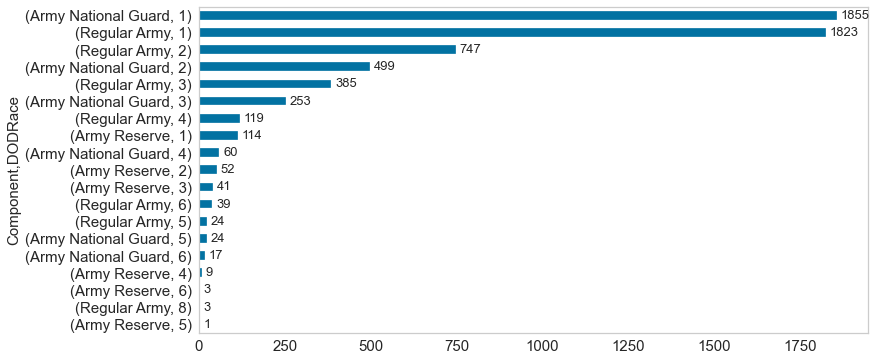

In [117]:
g = df.groupby(["Component"])["DODRace"].value_counts().sort_values().plot.barh()
g.bar_label(g.containers[0], padding=4, fontsize=13);

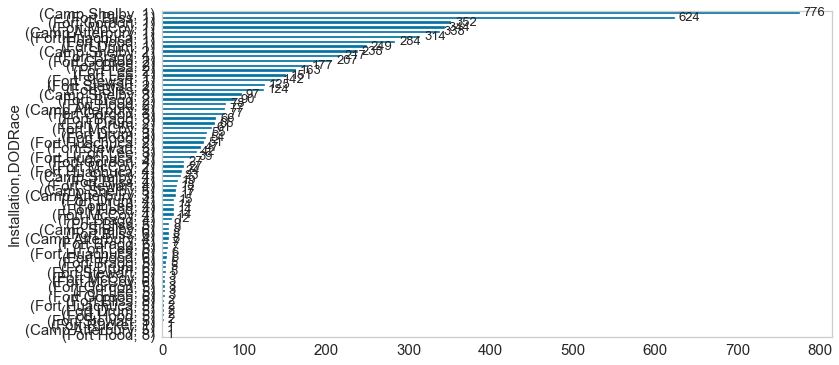

In [118]:
g = df.groupby(["Installation"])["DODRace"].value_counts().sort_values().plot.barh()
g.bar_label(g.containers[0], padding=4, fontsize=13);

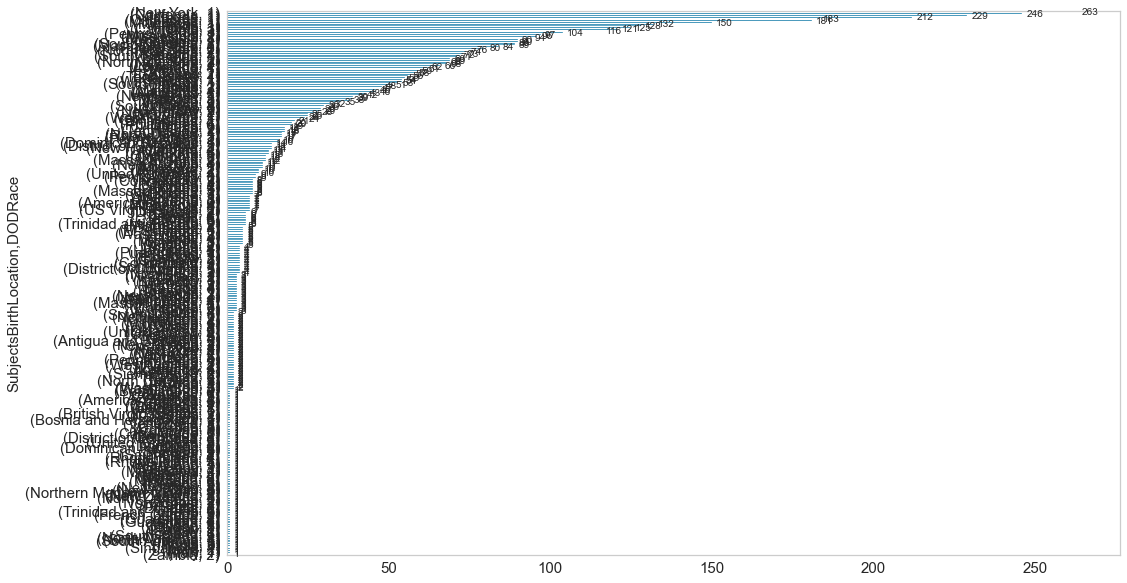

In [119]:
g = df.groupby(["SubjectsBirthLocation"])["DODRace"].value_counts().sort_values().plot.barh(figsize=(16,10))
g.bar_label(g.containers[0], padding=4, fontsize=10);

In [120]:
df[df['SubjectNumericRace']!=df['DODRace']].shape

(806, 108)

In [121]:
print(df.columns.to_list())

['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [122]:
# drop columns repeated and unnecessary column 
df.drop(columns=['subjectid', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectNumericRace',
    'Ethnicity', 'Heightin', 'Weightlbs'], inplace=True)

In [123]:
df["DODRace"].value_counts().sort_index()

1    3792
2    1298
3     679
4     188
5      49
6      59
8       3
Name: DODRace, dtype: int64

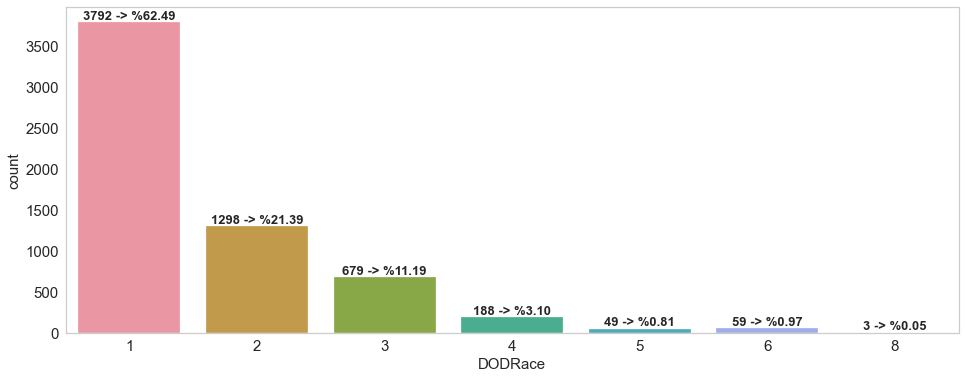

In [124]:
fig, ax = plt.subplots(figsize=(16,6))
# to show the proportion of each class
g = sns.countplot(df["DODRace"])
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{100*(h/df["DODRace"].count()):0.2f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=13, weight='bold', rotation=0) 

In [125]:
df = df[df['DODRace'].isin([1,2,3])]
df['DODRace'].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

<AxesSubplot:title={'center':'Percentage of Target'}>

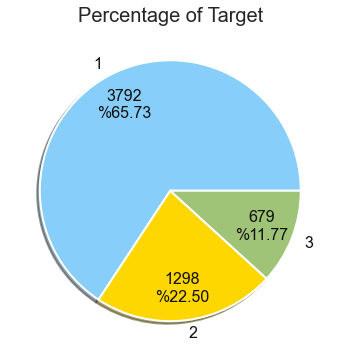

In [126]:
df['DODRace'].value_counts().sort_index().plot.pie(
#     subplots=True, layout=(1,2),
#     startangle=90, legend=True,
    shadow=True, figsize=(6,6),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g', 'm'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title='Percentage of Target',
#     labels=['Kecimen', 'Besni'],
    ylabel= "",
    labeldistance=1.1, pctdistance=0.75, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x), 
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     "%.1f%%"
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
)#.legend(loc='best', bbox_to_anchor=(1.0, 0.5)); # Not subplots

In [127]:
df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)

DODRace      
Gender   Female  Male
DODRace              
1           975  2817
2           656   642
3           239   440

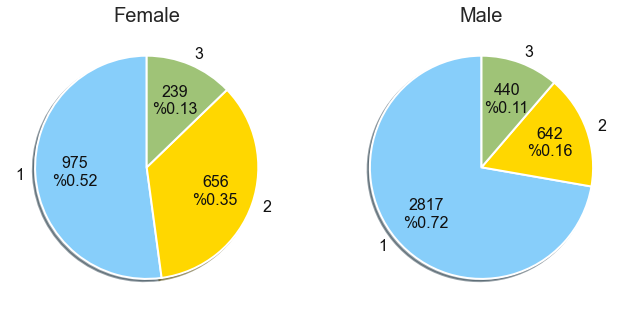

In [128]:
g = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0).plot.pie(
    subplots=True, layout=(1,2), 
    startangle=90, legend=False,
    shadow=True, figsize=(11,11),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title=["Female","Male"],
    ylabel= "",
#     labels=['Kecimen', 'Besni'],
    labeldistance=1.1, pctdistance=0.65, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x), 
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     "%.1f%%"
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
)#.legend(loc='best', bbox_to_anchor=(1.0, 0.5)); # Not subplots

data = df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)
data_per = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0)
for x, ra in enumerate(g.ravel()):
    index = 1
    for y, te in enumerate(ra.texts):
        if y%2:
            te.set_text(f'{data.iloc[:, x][index].round(2)}\n%{data_per.iloc[:, x][index].round(2)}')
            index+=1

## Outlier Detection

In [129]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction
def detect_outliers(df, col_name, tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
                      
    upper_limit = q3 + (tukey*IQR)
    lower_limit = q1 - (tukey*IQR)
    outlier_count = ((df[col_name]<lower_limit) | (df[col_name]>upper_limit)).sum()
 
    return lower_limit, upper_limit, outlier_count

In [130]:
# iqr=3
def get_outliers_cols(df, columns, tukey=3):
    out_cols = []
    for col in columns:
        print(
            f"{detect_outliers(df, col, tukey)[2]:<3}: outlier -> {col}\
            \nlower:{detect_outliers(df, col, tukey)[0]:<10}, upper:{detect_outliers(df, col, tukey)[1]:<10}\n"
        )
        out_cols.append(col) if detect_outliers(df, col, tukey)[2] else _
            
    return out_cols 

In [131]:
# objects = df.select_dtypes('O').columns
numeric = df.select_dtypes('number').columns

numeric.shape

(95,)

In [132]:
out_cols = get_outliers_cols(df, numeric, tukey=3)

1  : outlier -> abdominalextensiondepthsitting            
lower:64.0      , upper:428.0     

0  : outlier -> acromialheight            
lower:1020.0    , upper:1797.0    

0  : outlier -> acromionradialelength            
lower:230.0     , upper:426.0     

0  : outlier -> anklecircumference            
lower:151.0     , upper:298.0     

0  : outlier -> axillaheight            
lower:955.0     , upper:1648.0    

0  : outlier -> balloffootcircumference            
lower:164.0     , upper:325.0     

0  : outlier -> balloffootlength            
lower:129.0     , upper:262.0     

0  : outlier -> biacromialbreadth            
lower:242.0     , upper:557.0     

0  : outlier -> bicepscircumferenceflexed            
lower:138.0     , upper:544.0     

0  : outlier -> bicristalbreadth            
lower:184.0     , upper:366.0     

0  : outlier -> bideltoidbreadth            
lower:284.0     , upper:697.0     

0  : outlier -> bimalleolarbreadth            
lower:44.0      , upper:100.0 

In [133]:
out_cols

['abdominalextensiondepthsitting',
 'chestdepth',
 'hipbreadth',
 'hipbreadthsitting',
 'lowerthighcircumference',
 'thighclearance',
 'waistdepth']

In [134]:
df1 = df.copy()

In [135]:
# # We have decided to drop outliers over 1,5 iqr
# for col in out_cols:
#     df = df[(df[col]>detect_outliers(df, col, tukey=1.5)[0]) & (df[col]<detect_outliers(df, col, tukey=1.5)[1])]
# df.shape

In [136]:
len(df1) - len(df)

0

In [137]:
df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)

DODRace      
Gender   Female  Male
DODRace              
1           975  2817
2           656   642
3           239   440

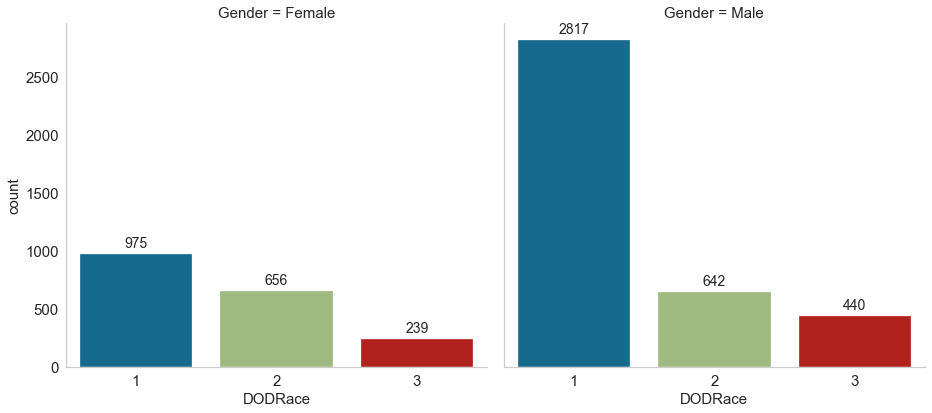

In [138]:
g = sns.catplot(
    x="DODRace", data=df,  hue=None,
    kind="count", col="Gender",   
    height=6, aspect=1.1,
);
for f in g.axes.flatten():
    for c in f.containers:
        f.bar_label(c, padding=4, fontsize=14);

### Numerical Columns

#### Hist plot All Numerical Columns

In [139]:
# df[numeric].hist(
#     layout=(int(np.ceil(len(numeric)/4)), 4),
#     figsize=(16, 64), bins=50, 
#     xlabelsize=12, ylabelsize=12,
#     color="darkcyan", edgecolor="black", 
# );

  #### Box plot All Numerical Columns

In [140]:
# fig = plt.figure(figsize=(16, 48))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.25
# )
# for i, col in enumerate(numeric):
#     plt.subplot(int(np.ceil(len(numeric)/3)), 3, i+1)
#     sns.boxplot(x='DODRace', y=col, data=df, whis=1.5)

#### Regplot plot All Numerical Columns

In [141]:
# fig = plt.figure(figsize=(16,64))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.2
# )
# for i, col in enumerate(numeric):
#     plt.subplot(int(np.ceil(len(numeric)/4)), 4, i+1)
#     sns.regplot(x='DODRace', y=col, data=df, scatter_kws={"s": 14})

### Categorical Columns

#### Countplot for Categorical Columns

In [142]:
# fig, axes = plt.subplots(int(np.ceil(len(objects)/4)), 4, figsize=(18, 7))

# for col, ax in zip(objects, axes):
#     ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#     sns.countplot(x=df[col], alpha=0.7, data=df, ax=ax, palette="Set1")
#     ax.bar_label(ax.containers[0])

#### Boxplots for Categorical Columns

In [143]:
# fig, axes = plt.subplots(int(np.ceil(len(objects)/4)), 4, figsize=(18, 7))

# for col, ax in zip(objects, axes):
#     ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
#     sns.boxplot(x=df[col], y="DODRace", data=df, ax=ax, palette="Spectral_r")

## Correlation between numerical features

In [144]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [145]:
def check_multicolinarity(data, rate=0.9):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= rate and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    df_corr
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

# check_multicolinarity(df)

In [146]:
# sns.heatmap(
#     df[numeric].corr().round(2), 
#     mask=np.triu(np.ones_like(df[numeric].corr(), dtype=bool)), 
#     annot=True, vmin=-1, vmax=1
# )

In [147]:
# dfCorr = df[numeric].corr()
# filteredDf = dfCorr[(abs(dfCorr) >=.6) & (abs(dfCorr)!=1)]
# sns.heatmap(
#     filteredDf, 
#     mask=np.triu(np.ones_like(df[numeric].corr(), dtype=bool)), 
#     annot=True, vmin=-1, vmax=1, cmap="PiYG"
# )

In [148]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(5)

,,Corr
abdominalextensiondepthsitting,abdominalextensiondepthsitting,1.0000
cervicaleheight,stature,0.9911
stature,suprasternaleheight,0.9891
cervicaleheight,suprasternaleheight,0.9891
acromialheight,axillaheight,0.9871


In [149]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.4+ MB


In [150]:
df.reset_index(drop=True, inplace=True)

In [151]:
df.to_csv("ansurII_2.csv", index = False)

# Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

## Import Libraries

In [152]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [153]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

## DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

### Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [154]:
df = pd.read_csv("ansurII_2.csv")
df.shape

(5769, 98)

In [155]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.3+ MB


In [156]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

### Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### `OneHotEncoder` for X_train and X_test

In [158]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [159]:
# way-2
from sklearn.preprocessing import OneHotEncoder

def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(
        enc.fit_transform(X_train[cat]), index = X_train.index, 
        columns = enc.get_feature_names_out(cat)
    )    
    X_test_cat  = pd.DataFrame(
        enc.transform(X_test[cat]), index = X_test.index, 
        columns = enc.get_feature_names_out(cat)
    )    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

X_train_enc, X_test_enc = trans_2_OneHotEncoder(X_train, X_test)

In [160]:
X_train_enc.shape, X_test_enc.shape, X_train.shape[0]+X_test.shape[0]

((4615, 222), (1154, 222), 5769)

In [161]:
X_train.shape, X_test.shape, X_train.shape[0]+X_test.shape[0]

((4615, 97), (1154, 97), 5769)

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

# Distance Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [163]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :f1_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'recall_test'   :recall_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'precision_test':precision_score(y_test, y_pred_test, average=average, labels=labels)[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :f1_score(y_train, y_pred_train, average=average, labels=labels)[0],        
        'recall_train'   :recall_score(y_train, y_pred_train, average=average, labels=labels)[0],
        'precision_train':precision_score(y_train, y_pred_train, average=average, labels=labels)[0],
    }, orient='index', columns=[model_name]).T

## 1. Implement Logistic Regression Model

### Vanilla Logistic Regression Model

In [164]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler() 
log_model = LogisticRegression(random_state=42) 

# pipeline for Logistic Regression
pipe_log = Pipeline([
    ("scaler", scaler), 
    ("log", log_model)
])
pipe_log.fit(X_train_enc, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log', LogisticRegression(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.94      0.90      0.92       260
           2       0.76      0.54      0.63       136

    accuracy                           0.90      1154
   macro avg       0.87      0.80      0.83      1154
weighted avg       0.90      0.90      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      3034
           1       0.95      0.92      0.93      1038
           2       0.84      0.57      0.68       543

    accuracy                           0.92      4615
   macro avg       0.90      0.82      0.85      4615
weighted avg       0.91      0.92      0.91      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.9012,0.6293,0.5368,0.7604,0.9161,0.6812,0.5746,0.8365


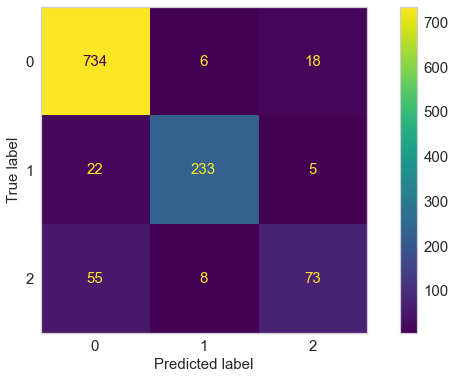

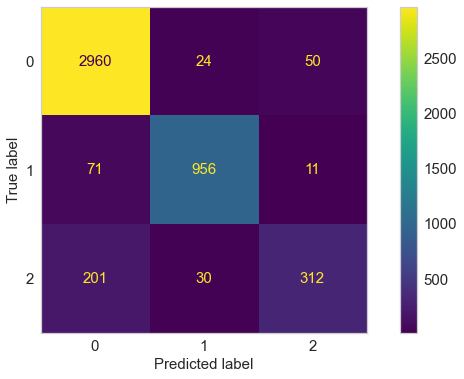

In [165]:
eval_metric(
    pipe_log, X_train_enc, y_train, X_test_enc, y_test, 
    'Logistic Regression', average=None, labels=[2]
)

### Cross Validate Model
* Use the cross_val_score function to evaluate the model using the train set.

In [217]:
# import sklearn sklearn.metrics.SCORERS.keys()

In [166]:
from sklearn.model_selection import cross_validate, cross_val_score

log_model = LogisticRegression(random_state=42)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
]) 
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6385
test_recall_2      0.5378
test_precision_2   0.7940
dtype: float64

### With Best Parameters (GridsearchCV)

- optuna, halwing grid

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

log_model = LogisticRegression(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
])
param_grid = {
    "log__penalty" : ['l2', 'none'],
    "log__C" : np.linspace(0.1, 5, 4),
    "log__class_weight" : [None, "balanced"],
    "log__solver" : ['newton-cg', 'lbfgs'], # ["lbfgs", "liblinear", "sag", "saga"]
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=recall_2, # 'f1_macro'
    error_score="raise",
    n_jobs=-1,
    cv=5
) 

In [168]:
# grid_model.estimator.get_params().keys()

In [169]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 3.38 s
Wall time: 8min 27s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('log',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': array([0.1       , 1.73333333, 3.36666667, 5.        ]),
                         'log__class_weight': [None, 'balanced'],
                         'log__penalty': ['l2', 'none'],
                         'log__solver': ['newton-cg', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [170]:
grid_model.best_params_ # default accuracy score

{'log__C': 5.0,
 'log__class_weight': 'balanced',
 'log__penalty': 'l2',
 'log__solver': 'lbfgs'}

In [171]:
grid_model.best_score_

0.773598369011213

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       758
           1       0.92      0.92      0.92       260
           2       0.56      0.82      0.66       136

    accuracy                           0.88      1154
   macro avg       0.81      0.87      0.83      1154
weighted avg       0.90      0.88      0.89      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3034
           1       0.92      0.94      0.93      1038
           2       0.54      0.85      0.66       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.8795,0.6627,0.8162,0.5578,0.8767,0.6628,0.8527,0.5422


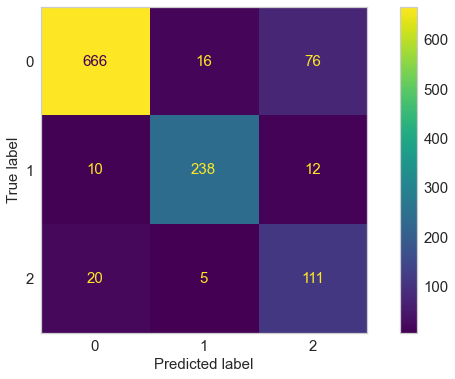

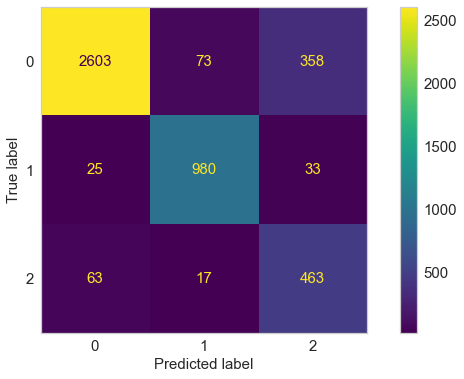

In [172]:
out_score_log = eval_metric(
    grid_model, X_train, y_train, X_test, y_test,
    'Logistic Regression', average=None, labels=[2]
)
out_score_log

## 2. Implement Support Vector Machine Model

### Vanilla  Bagging - LinearSVC model 

In [173]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

svc_model = LinearSVC(random_state=42)  
bag_svc_model = BaggingClassifier(svc_model) 

# pipeline for SVC regression
pipe_bag_svc = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
]) 
pipe_bag_svc.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('bag_svc',
                 BaggingClassifier(base_estimator=LinearSVC(random_state=42)))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.92      0.92      0.92       260
           2       0.84      0.54      0.65       136

    accuracy                           0.91      1154
   macro avg       0.89      0.81      0.84      1154
weighted avg       0.91      0.91      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3034
           1       0.95      0.93      0.94      1038
           2       0.87      0.55      0.67       543

    accuracy                           0.92      4615
   macro avg       0.91      0.82      0.85      4615
weighted avg       0.92      0.92      0.91      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Bagging SVC,0.9081,0.6547,0.5368,0.8391,0.9183,0.6742,0.5506,0.8692


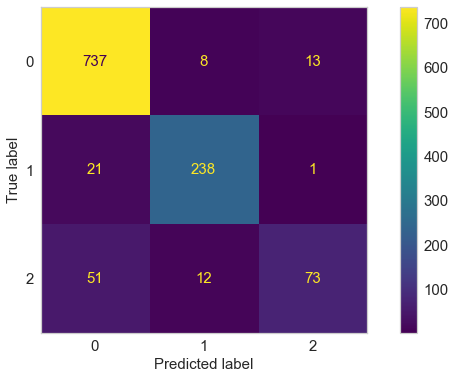

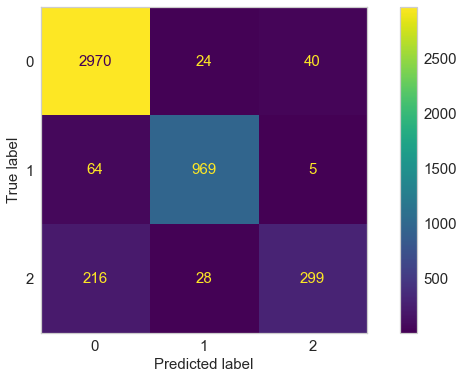

In [174]:
eval_metric(
    pipe_bag_svc, X_train, y_train, X_test, y_test, 
    'Bagging SVC', average=None, labels=[2]
)

### Cross Validate Model

In [175]:
from sklearn.model_selection import cross_validate, cross_val_score

svc_model = LinearSVC(random_state=42)  
bag_svc_model = BaggingClassifier(svc_model)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6220
test_precision_2   0.8198
test_recall_2      0.5047
dtype: float64

### With Best Parameters (GridsearchCV)

In [198]:
from sklearn.model_selection import GridSearchCV

# probability True to obtain ROC etc.
svc_model = SVC(probability=True, random_state=42)  
bag_svc_model = BaggingClassifier(svc_model) 

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])
param_grid = {
    # BaggingClassifier # n_estimators*max_samples > data
    'bag_svc__n_estimators': [5],
#     'bag_svc__max_samples': [0.9],
    # SVC
    'bag_svc__base_estimator__C': np.linspace(1, 5, 2),
    'bag_svc__base_estimator__gamma': ['scale', 'auto', 1],
    'bag_svc__base_estimator__kernel': ['linear', 'poly', 'rbf'],
    'bag_svc__base_estimator__degree': [2],
    'bag_svc__base_estimator__class_weight': ['balanced'],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    n_jobs=-1,
    cv=4
) 
# grid_model.estimator.get_params().keys()

In [199]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 34.6 s
Wall time: 13min 38s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('bag_svc',
                                        BaggingClassifier(base_estimator=SVC(probability=True,
                                                                             random_state=42)))]),
             n_jobs=-1,
             param_grid={'bag_svc__base_estimator__C': array([1., 5.]),
                         'bag_svc__base_estimator__class_weight': ['balanced'],
                         'bag_svc__base_estimator__degree': [2],
                         'bag_svc__base_estimator__gamma': ['scale', 'auto', 1],
                         'bag_svc__base_estimator__kernel': ['linear', 'poly',
                                                             'rbf'],
                         'bag_svc__n_estimators': [5]},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [200]:
grid_model.best_params_

{'bag_svc__base_estimator__C': 1.0,
 'bag_svc__base_estimator__class_weight': 'balanced',
 'bag_svc__base_estimator__degree': 2,
 'bag_svc__base_estimator__gamma': 'scale',
 'bag_svc__base_estimator__kernel': 'poly',
 'bag_svc__n_estimators': 5}

In [201]:
grid_model.best_score_

0.5100626361655773

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.93      0.91      0.92       260
           2       0.77      0.51      0.61       136

    accuracy                           0.90      1154
   macro avg       0.87      0.79      0.82      1154
weighted avg       0.89      0.90      0.89      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3034
           1       0.93      0.92      0.93      1038
           2       0.76      0.57      0.65       543

    accuracy                           0.91      4615
   macro avg       0.87      0.82      0.84      4615
weighted avg       0.90      0.91      0.90      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Bagging SVC,0.9003,0.6106,0.5074,0.7667,0.9064,0.6548,0.5746,0.7610


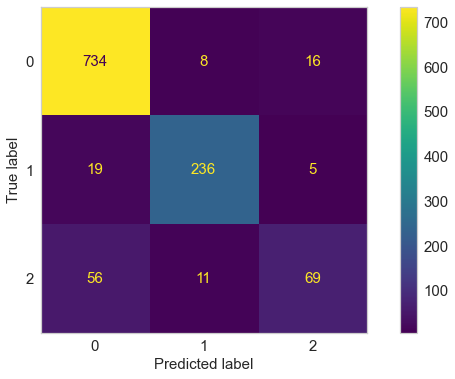

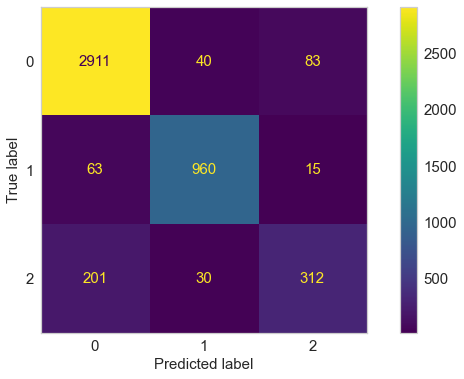

In [202]:
out_score_bag_svc = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Bagging SVC', average=None, labels=[2]
)
out_score_bag_svc

# Tree Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [203]:
df = pd.read_csv("ansurII_2.csv")
df.shape

(5769, 98)

In [204]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.3+ MB


In [205]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

### Train | Test Split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### `OrdinalEncoder` for Decision Tree Classifier Based Models

In [207]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes("object").columns.to_list()    
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough'
)

In [208]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

## 1. Implement Decision Tree Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla DT Model

In [209]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for DecisionTree Classifier
pipe_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('dt', DecisionTreeClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       758
           1       0.63      0.66      0.64       260
           2       0.18      0.21      0.20       136

    accuracy                           0.68      1154
   macro avg       0.54      0.55      0.54      1154
weighted avg       0.69      0.68      0.68      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.6776,0.1959,0.2132,0.1812,1.0000,1.0000,1.0000,1.0000


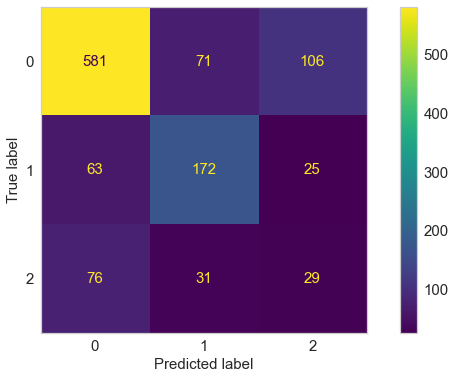

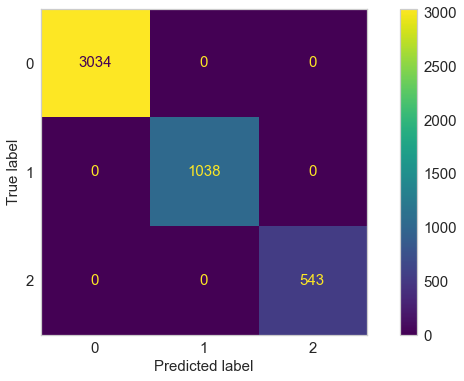

In [210]:
eval_metric(
    pipe_dt, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)

### Cross Validate Model

In [211]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.1993
test_precision_2   0.1949
test_recall_2      0.2044
dtype: float64

### With Best Parameters (GridsearchCV)

In [242]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
param_grid = {
    "dt__splitter":["best", "random"],
    "dt__max_features":[None, "auto", "log2", .3, .5],
    "dt__max_depth": [None, 1, 3, 5],
    "dt__min_samples_split": [2, 5, 7],
    "dt__min_samples_leaf": [1, 3, 5, 7],
    "dt__class_weight" : [None, "balanced"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    error_score="raise",
    scoring=recall_2, 
    n_jobs=-1,
    cv=5,
)

In [243]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 18.3 s
Wall time: 1min 10s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__class_weight': [None, 'balanced'],
                         'dt__max_depth': [None, 1, 3, 5],
                         'dt__max_features': [None, 'auto', 'log2', 0.3, 0.5],
                         'dt__min_samples_leaf': [1, 3, 5, 7],
                         'dt__min_samples_split': [2, 5, 7],
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [244]:
grid_model.best_params_

{'dt__class_weight': 'balanced',
 'dt__max_depth': 1,
 'dt__max_features': 'log2',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__splitter': 'best'}

In [245]:
grid_model.best_score_

0.8509344206591913

TEST REPORT
              precision    recall  f1-score   support

           0       0.78      0.34      0.47       758
           1       0.00      0.00      0.00       260
           2       0.14      0.87      0.25       136

    accuracy                           0.33      1154
   macro avg       0.31      0.40      0.24      1154
weighted avg       0.53      0.33      0.34      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.77      0.31      0.44      3034
           1       0.00      0.00      0.00      1038
           2       0.14      0.90      0.25       543

    accuracy                           0.31      4615
   macro avg       0.30      0.40      0.23      4615
weighted avg       0.52      0.31      0.32      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.3267,0.2466,0.8676,0.1437,0.3112,0.2494,0.9024,0.1447


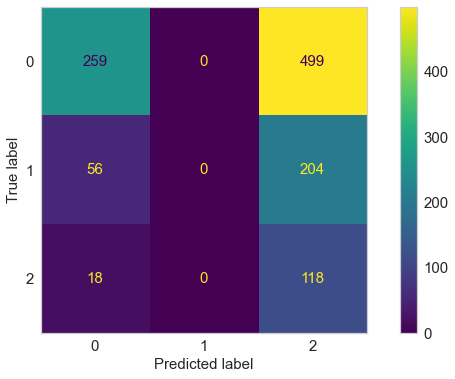

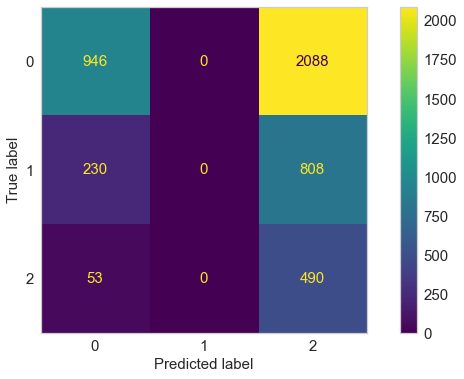

In [246]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

## 2. Implement Bagging Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla Bagging - Decision Tree Model

In [247]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=42)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for Bagging Classifier
pipe_bag_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])
pipe_bag_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('bag_dt',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       758
           1       0.79      0.75      0.77       260
           2       0.54      0.15      0.23       136

    accuracy                           0.81      1154
   macro avg       0.72      0.61      0.63      1154
weighted avg       0.78      0.81      0.78      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       0.99      0.98      0.99      1038
           2       1.00      0.91      0.95       543

    accuracy                           0.98      4615
   macro avg       0.99      0.96      0.97      4615
weighted avg       0.98      0.98      0.98      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Bagging Decision Tree,0.8085,0.2312,0.1471,0.5405,0.9842,0.9499,0.9079,0.9960


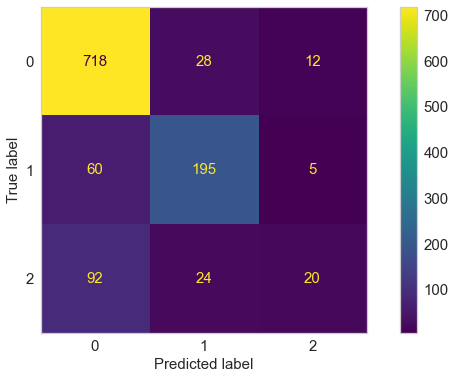

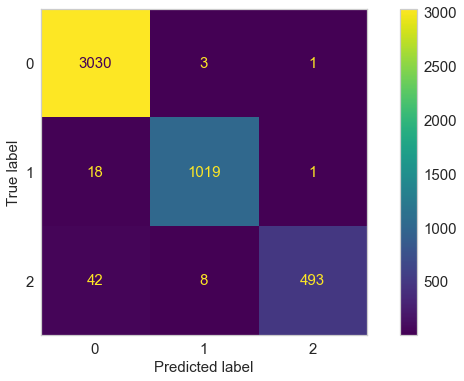

In [248]:
eval_metric(
    pipe_bag_dt, X_train, y_train, X_test, y_test, 
    'Bagging Decision Tree', average=None, labels=[2]
)

### Cross Validate Model

In [249]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=42)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.1380
test_precision_2   0.3480
test_recall_2      0.0867
dtype: float64

### With Best Parameters (GridsearchCV)

In [250]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])
param_grid = {
    # BaggingClassifier
    "bag_dt__n_estimators": [2, 5, 10],
#     "bag_dt__max_samples": [.7, .9],
#     "bag_dt__max_features":[.4, .8],
    # DecisionTreeClassifier
    "bag_dt__base_estimator__splitter":["best", "random"],
    "bag_dt__base_estimator__max_depth": [None, 1, 5],
    "bag_dt__base_estimator__class_weight" : [None, "balanced"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    error_score="raise",
    scoring=recall_2, 
    n_jobs=-1,
    cv=5,
)
# grid_model.estimator.get_params().keys()

In [251]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 1.45 s
Wall time: 19.1 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('bag_dt',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)))]),
             n_jobs=-1,
             param_grid={'bag_dt__base_estimator__class_weight': [None,
                                                                  'balanced'],
                         'bag_dt__base_estimator__max_depth': [None, 1, 5],
                         'bag_dt__base_estimator__splitter': ['best', 'random'],
                         'bag_dt__n_estimators': [2, 5, 10]},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [252]:
grid_model.best_params_

{'bag_dt__base_estimator__class_weight': 'balanced',
 'bag_dt__base_estimator__max_depth': 5,
 'bag_dt__base_estimator__splitter': 'random',
 'bag_dt__n_estimators': 5}

In [253]:
grid_model.best_score_

0.5616547740400952

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       758
           1       0.63      0.72      0.67       260
           2       0.25      0.58      0.35       136

    accuracy                           0.65      1154
   macro avg       0.59      0.64      0.59      1154
weighted avg       0.75      0.65      0.68      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      3034
           1       0.67      0.77      0.72      1038
           2       0.26      0.62      0.37       543

    accuracy                           0.66      4615
   macro avg       0.61      0.67      0.61      4615
weighted avg       0.77      0.66      0.69      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Bagging Decision Tree,0.6456,0.3480,0.5809,0.2484,0.6596,0.3695,0.6206,0.2631


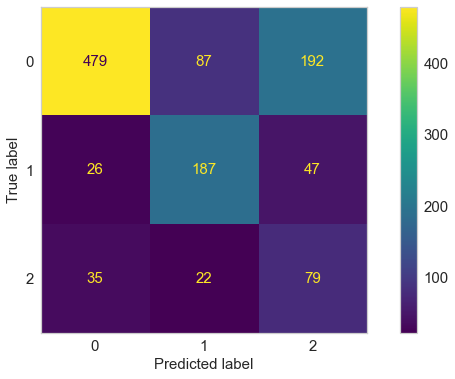

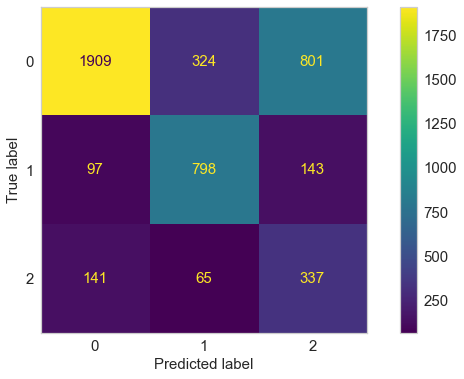

In [254]:
out_score_bag_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Bagging Decision Tree', average=None, labels=[2]
)
out_score_bag_dt

## 3. Implement RF Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla RF Model

In [255]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for Random Forest Classifier
pipe_rfc = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       758
           1       0.63      0.66      0.64       260
           2       0.18      0.21      0.20       136

    accuracy                           0.68      1154
   macro avg       0.54      0.55      0.54      1154
weighted avg       0.69      0.68      0.68      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.6776,0.1959,0.2132,0.1812,1.0000,1.0000,1.0000,1.0000


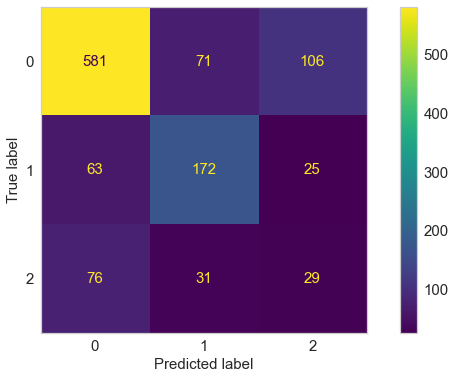

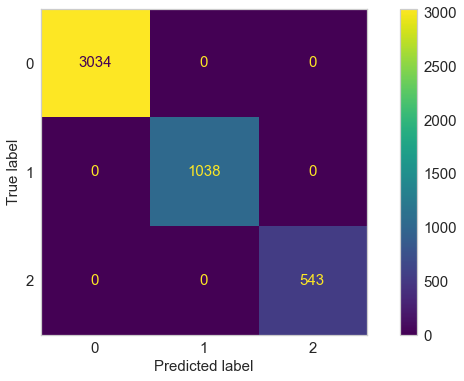

In [256]:
eval_metric(
    pipe_dt, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[2]
)

### Cross Validate Model

In [257]:
from sklearn.model_selection import cross_validate, cross_val_score

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.0925
test_precision_2   0.7117
test_recall_2      0.0497
dtype: float64

### With Best Parameters (GridsearchCV)

In [261]:
from sklearn.model_selection import GridSearchCV

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
param_grid = {
    'rfc__max_depth':[2,3], 
    'rfc__n_estimators':[5,10],
    'rfc__criterion': ["entropy","log_loss"],
    'rfc__max_features':[None, 'auto', .1, .2],
    'rfc__class_weight': [None, 'balanced'],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    refit=True,
    verbose=2,
    n_jobs=-1,
    cv=5,
)

In [262]:
%%time
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
CPU times: total: 2.33 s
Wall time: 23.5 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__class_weight': [None, 'balanced'],
                         'rfc__criterion': ['entropy', 'log_loss'],
                         'rfc__max_depth': [2, 3],
                         'rfc__max_features': [None, 'auto', 0.1, 0.2],
                         'rfc__n_estimators': [5, 10]},
             scoring=make_scorer(recall_score, average=None, labels=[2]),
             verbose=2)

In [263]:
grid_model.best_params_

{'rfc__class_weight': 'balanced',
 'rfc__criterion': 'entropy',
 'rfc__max_depth': 2,
 'rfc__max_features': None,
 'rfc__n_estimators': 10}

In [264]:
grid_model.best_score_

0.6758409785932722

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       758
           1       0.54      0.58      0.56       260
           2       0.15      0.62      0.24       136

    accuracy                           0.42      1154
   macro avg       0.50      0.51      0.42      1154
weighted avg       0.67      0.42      0.46      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.80      0.31      0.45      3034
           1       0.55      0.60      0.57      1038
           2       0.17      0.73      0.28       543

    accuracy                           0.43      4615
   macro avg       0.51      0.55      0.43      4615
weighted avg       0.67      0.43      0.46      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.4151,0.2391,0.6250,0.1478,0.4258,0.2800,0.7330,0.1730


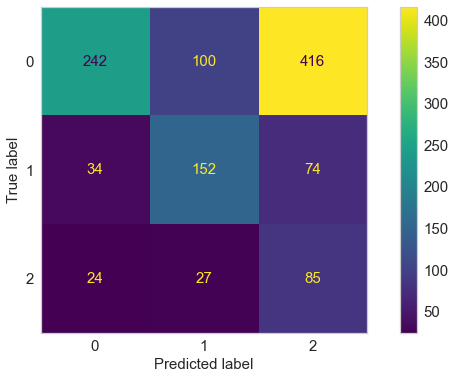

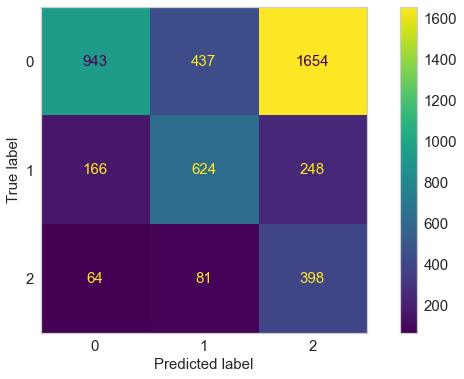

In [265]:
out_score_rfc = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[2]
)
out_score_rfc

## 4. Implement XGBoost Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla XGBoost Model

In [266]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_model = XGBClassifier(random_state=42)

# pipeline for XGBClassifier Classifier
pipe_xgb = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])

In [267]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 1.4820167 , 0.50703142,
       1.4820167 ])

In [268]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0     
0      0.5070    3034
1      1.4820    1038
2      2.8330     543
Name: 0, dtype: int64

In [269]:
pipe_xgb.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsampl...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=42, reg_alpha=0, ...))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       758
           1       0.90      0.88      0.89       260
           2       0.78      0.46      0.57       136

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.8865,0.5741,0.4559,0.7750,1.0000,1.0000,1.0000,1.0000


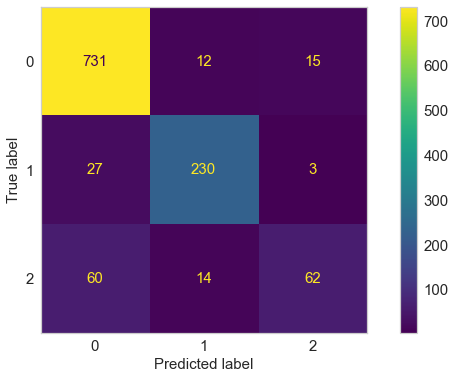

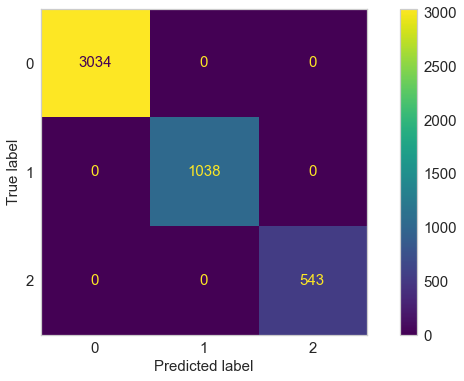

In [270]:
eval_metric(
    pipe_xgb, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[2]
)

### Cross Validate Model

In [271]:
from sklearn.model_selection import cross_validate, cross_val_score

xgb_model = XGBClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
    fit_params={"xgb__sample_weight":classes_weights}
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.5363
test_precision_2   0.7006
test_recall_2      0.4347
dtype: float64

### With Best Parameters (GridsearchCV)

In [272]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
]) 
param_grid = {
    'xgb__n_estimators':[50,100],
    'xgb__learning_rate': [0.1, 0.3],
    'xgb__max_depth':[1,2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'xgb__min_child_weight' : [8],
#     'xgb__min_split_loss': [0.8],
#     'xgb__reg_lambda' : [1],
#     'xgb__grow_policy': ['depthwise'],
#     'xgb__eval_metric' : ["merror"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    verbose=1,
    scoring=recall_2,
    refit=True,
    n_jobs=-1
)

In [273]:
%%time
grid_model.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: total: 4.73 s
Wall time: 1min 4s


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsamp...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1],
                         'xgb__learning_rate': [0.1, 0.3],
                         'xgb__max_depth': [1, 2], 'xgb__min_child_weight': [8],
                         'xgb__n_estimators': [50, 100],
                         'xgb__subsample': [0.8, 1]},
             scoring=make_scorer(recall_score, average=None, labels=[2]),
             verbose=1)

In [274]:
# xgb_grid_model.get_params().keys()
grid_model.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.3,
 'xgb__max_depth': 2,
 'xgb__min_child_weight': 8,
 'xgb__n_estimators': 50,
 'xgb__subsample': 1}

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       758
           1       0.84      0.85      0.85       260
           2       0.45      0.68      0.54       136

    accuracy                           0.82      1154
   macro avg       0.74      0.79      0.76      1154
weighted avg       0.85      0.82      0.83      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3034
           1       0.87      0.91      0.89      1038
           2       0.49      0.81      0.62       543

    accuracy                           0.84      4615
   macro avg       0.77      0.85      0.80      4615
weighted avg       0.88      0.84      0.85      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.8224,0.5380,0.6765,0.4466,0.8442,0.6151,0.8122,0.4949


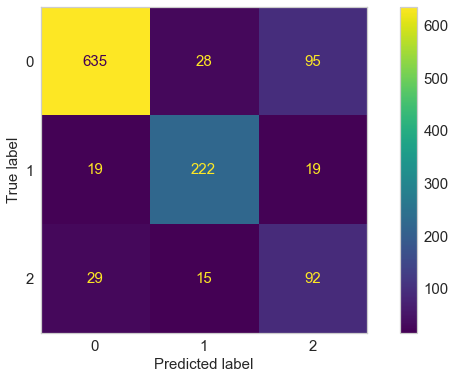

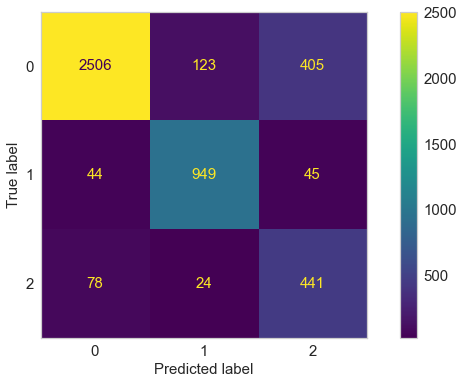

In [275]:
out_score_xgb = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[2]
)
out_score_xgb

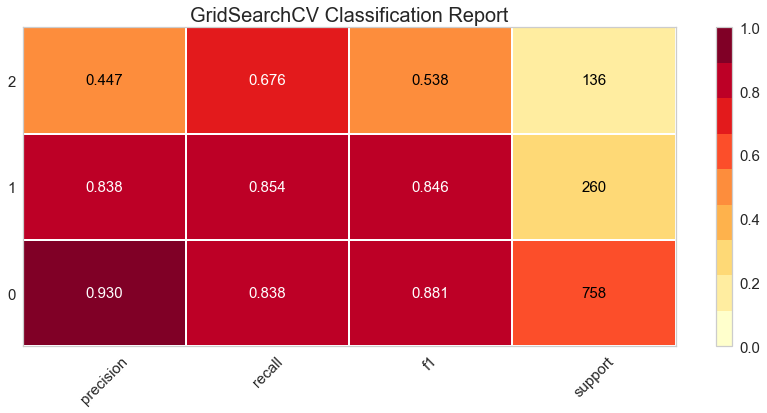

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [276]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

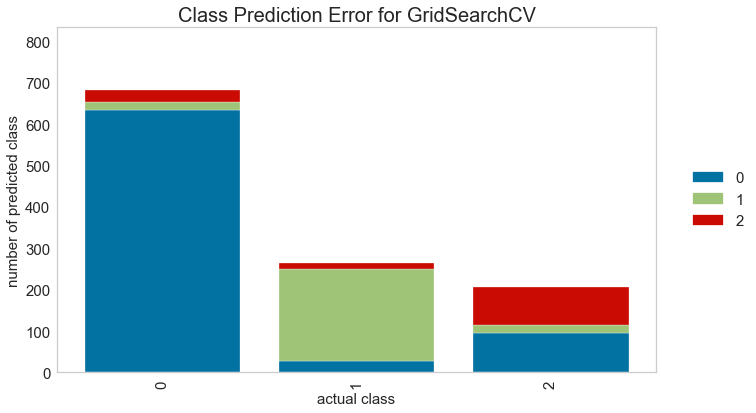

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [277]:
visualizer = ClassPredictionError(grid_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [278]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

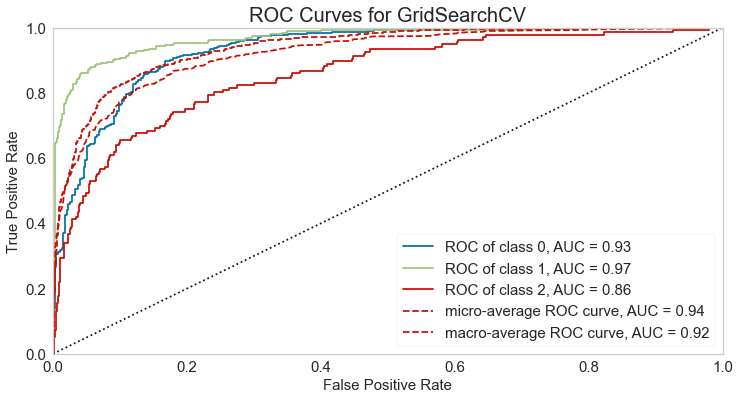

In [279]:
from yellowbrick.classifier import ROCAUC
model = grid_model

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


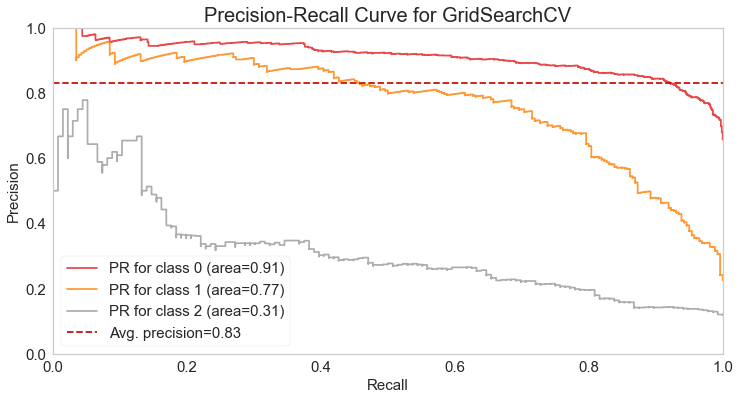

In [280]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

---
---

# Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [281]:
compare = pd.concat([out_score_log, out_score_bag_svc, out_score_dt, out_score_bag_dt, out_score_rfc, out_score_xgb])
compare

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.8795,0.6627,0.8162,0.5578,0.8767,0.6628,0.8527,0.5422
Bagging SVC,0.9003,0.6106,0.5074,0.7667,0.9064,0.6548,0.5746,0.7610
Decision Tree,0.3267,0.2466,0.8676,0.1437,0.3112,0.2494,0.9024,0.1447
Bagging Decision Tree,0.6456,0.3480,0.5809,0.2484,0.6596,0.3695,0.6206,0.2631
Random Forest,0.4151,0.2391,0.6250,0.1478,0.4258,0.2800,0.7330,0.1730
XGBoost,0.8224,0.5380,0.6765,0.4466,0.8442,0.6151,0.8122,0.4949


##  Accuracy Comparison

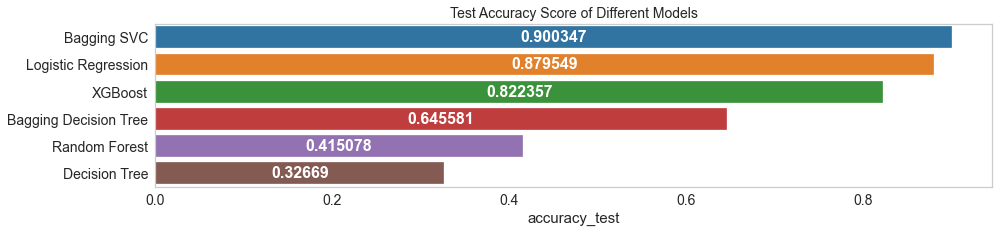

In [282]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare, palette="tab10")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  F1 Score Comparison

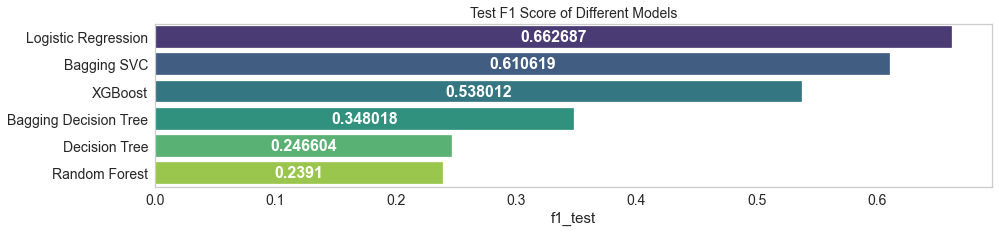

In [283]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare, palette="viridis")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Recall Score Comparison

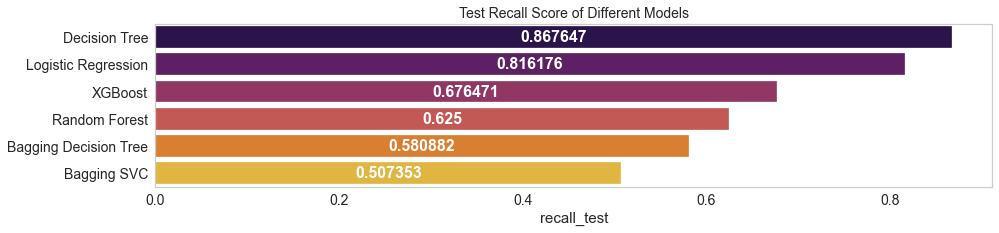

In [284]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare, palette="inferno")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Precision Score Comparison

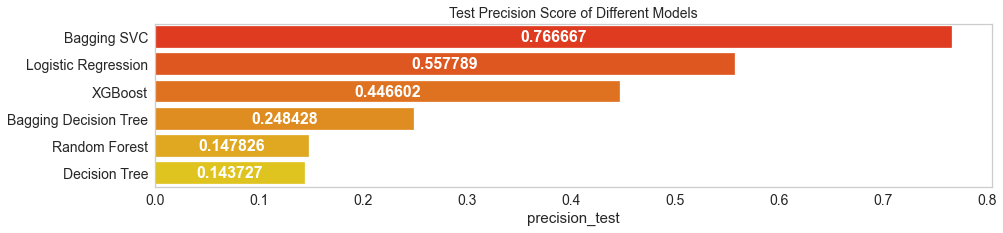

In [285]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare, palette="autumn")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___